In [1]:
import tensorflow as tf
import tensorflow
import sklearn
import math
import keras
import numpy
import pandas
import os
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.image as mpimg
from keras.utils import np_utils
import matplotlib.pyplot
from keras.models import Sequential,Model
from keras.losses import mse,sparse_categorical_crossentropy
from keras.layers import Dense, Conv2D, Conv1D, Conv3D, Flatten,Activation,MaxPool1D,MaxPooling1D,Dropout,LSTM,MaxPool2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.layers import Lambda, Input, Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard

In [2]:
img_size1 = 4
img_size2 = 1
num_channels = 1
latent_space_dim =24
num_category=3

In [3]:
#model building
cnn_model = Sequential()
#convolutional layer with rectified linear unit activation
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2",input_shape=(img_size1, img_size2, num_channels)))
cnn_model.add(MaxPooling2D(pool_size=(2, 1)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding="same", strides=1))
cnn_model.add(MaxPooling2D(pool_size=(2, 1)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding="same", strides=2))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu',padding="same", strides=1))
#flatten since too many dimensions, we only want a classification output
cnn_model.add(Flatten())
#fully connected to get all relevant data
cnn_model.add(Dense(latent_space_dim, activation='relu',name='feature_extraction'))
#randomly turn neurons on and off to improve convergence
cnn_model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
cnn_model.add(Dense(num_category, activation='softmax'))
# Run the model
cnn_model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.summary()
# early stopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_conv_2 (Conv2D)      (None, 4, 1, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 1, 32)          0         
_________________________________________________________________
conv2d (Conv2D)              (None, 2, 1, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          3

In [4]:
##########################################   préparation des données #######################################
datasetf2001 = pd.read_csv('D:/etm data/GoogleEarthEngine/Landsat_07/dataset_2001_2004/insitu_MH_2001.csv')
data2001=np.array(datasetf2001.iloc[:, 2:6])
datay=np.array(datasetf2001.iloc[:, 6:7])
x_train2001, x_test2001 = train_test_split(data2001, test_size = 0.3, random_state = 0)
y_train, y_test = train_test_split(datay, test_size = 0.3, random_state = 0)
x_train2001 = numpy.reshape(x_train2001, newshape=(x_train2001.shape[0], x_train2001.shape[1],1,1))
x_test2001 = numpy.reshape(x_test2001, newshape=( x_test2001.shape[0], x_test2001.shape[1],1,1))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
data2001.shape

(520873, 4)

In [5]:
##########################################   préparation des données #######################################
datasetf2004 = pd.read_csv('D:/etm data/GoogleEarthEngine/Landsat_07/dataset_2001_2004/insitu_MH_2004.csv')
data2004=np.array(datasetf2004.iloc[:, 2:6])
x_train2004, x_test2004 = train_test_split(data2004, test_size = 0.3, random_state = 0)
x_train2004 = numpy.reshape(x_train2004, newshape=(x_train2004.shape[0], x_train2004.shape[1],1))
x_test2004 = numpy.reshape(x_test2004, newshape=( x_test2004.shape[0], x_test2004.shape[1],1))
data2004.shape

(520873, 4)

In [6]:
hist=cnn_model.fit(x_train2001, y_train, epochs=1000, batch_size=256,callbacks=[es])

Epoch 1/1000
1425/1425 [==============================] - 9s 5ms/step - loss: 0.4695 - accuracy: 0.7852
Epoch 2/1000
1425/1425 [==============================] - 9s 6ms/step - loss: 0.2654 - accuracy: 0.8901
Epoch 3/1000
1425/1425 [==============================] - 8s 5ms/step - loss: 0.2500 - accuracy: 0.8958
Epoch 4/1000
1425/1425 [==============================] - 7s 5ms/step - loss: 0.2413 - accuracy: 0.8988
Epoch 5/1000
1425/1425 [==============================] - 7s 5ms/step - loss: 0.2488 - accuracy: 0.8960
Epoch 6/1000
1425/1425 [==============================] - 8s 5ms/step - loss: 0.2339 - accuracy: 0.9024
Epoch 7/1000
1425/1425 [==============================] - 7s 5ms/step - loss: 0.2365 - accuracy: 0.9015
Epoch 8/1000
1425/1425 [==============================] - 7s 5ms/step - loss: 0.2333 - accuracy: 0.9029
Epoch 9/1000
1425/1425 [==============================] - 8s 5ms/step - loss: 0.2282 - accuracy: 0.9045
Epoch 10/1000
1425/1425 [==============================] - 8s 6m

In [7]:
feature_extraction = Model(inputs=cnn_model.input,outputs=cnn_model.get_layer('feature_extraction').output)
weights = feature_extraction.get_weights()
for l in feature_extraction.layers:
    l.trainable = False
    print(l.name, l.trainable)
# re-compile the model
feature_extraction.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

encoder_conv_2_input False
encoder_conv_2 False
max_pooling2d False
conv2d False
max_pooling2d_1 False
conv2d_1 False
max_pooling2d_2 False
conv2d_2 False
flatten False
feature_extraction False


In [8]:
cnn_in_1 = tensorflow.keras.layers.Input(shape=(img_size1, img_size2,1), name="s_input1")
cnn_in_2 = tensorflow.keras.layers.Input(shape=(img_size1, img_size2,1), name="s_input2")
concatted = tf.keras.layers.Concatenate()([feature_extraction(cnn_in_1), feature_extraction(cnn_in_2)])
prediction = Dense(num_category, activation='softmax', name="classifier")(concatted)
Siamese_cnn=Model(inputs=[cnn_in_1,cnn_in_2],outputs=prediction)
Siamese_cnn.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
Siamese_cnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
s_input1 (InputLayer)           [(None, 4, 1, 1)]    0                                            
__________________________________________________________________________________________________
s_input2 (InputLayer)           [(None, 4, 1, 1)]    0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 24)           94232       s_input1[0][0]                   
                                                                 s_input2[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 48)           0           model[0][0]                

In [9]:
ces = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
history=Siamese_cnn.fit([x_train2001,x_train2004],y_train,batch_size=256,epochs=1000,callbacks=[ces]) 

Epoch 1/1000
1425/1425 [==============================] - 9s 4ms/step - loss: 0.1444 - accuracy: 0.9470
Epoch 2/1000
1425/1425 [==============================] - 5s 4ms/step - loss: 0.1186 - accuracy: 0.9540
Epoch 3/1000
1425/1425 [==============================] - 5s 3ms/step - loss: 0.1152 - accuracy: 0.9550
Epoch 4/1000
1425/1425 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.95 - 5s 4ms/step - loss: 0.1136 - accuracy: 0.9558
Epoch 5/1000
1425/1425 [==============================] - 5s 4ms/step - loss: 0.1120 - accuracy: 0.9561
Epoch 6/1000
1425/1425 [==============================] - 6s 4ms/step - loss: 0.1113 - accuracy: 0.9564
Epoch 7/1000
1425/1425 [==============================] - 6s 4ms/step - loss: 0.1103 - accuracy: 0.9566
Epoch 8/1000
1425/1425 [==============================] - 5s 4ms/step - loss: 0.1093 - accuracy: 0.9568
Epoch 9/1000
1425/1425 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9567
Epoch 10/1000
1425/142

In [10]:
Siamese_cnn.save('Siamese_cnn.h5')

dict_keys(['loss', 'accuracy'])


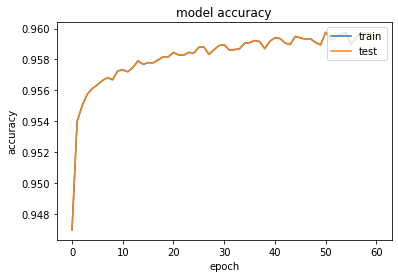

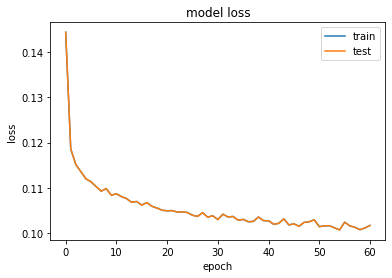

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [12]:
data2001 = numpy.reshape(data2001, newshape=(data2001.shape[0], data2001.shape[1],1,1))
data2004 = numpy.reshape(data2004, newshape=(data2004.shape[0], data2004.shape[1],1,1))
Y_pred=Siamese_cnn.predict([data2001,data2004])
datasetvae2001_class = pd.DataFrame(datasetf2001['x'])
datasetvae2004_class = pd.DataFrame(datasetf2001['x'])
datasetvae2001_class['y'] = pd.DataFrame(datasetf2001['y'],columns=['y'])
datasetvae2004_class['y'] = pd.DataFrame(datasetf2001['y'],columns=['y'])
datasetvae2001_class['f1'] = pd.DataFrame(datasetf2001['f1'])
datasetvae2001_class['f2'] = pd.DataFrame(datasetf2001['f2'])
datasetvae2001_class['f3'] = pd.DataFrame(datasetf2001['f3'])
datasetvae2001_class['f4'] = pd.DataFrame(datasetf2001['f4'])
datasetvae2004_class['f1'] = pd.DataFrame(datasetf2004['f1'])
datasetvae2004_class['f2'] = pd.DataFrame(datasetf2004['f2'])
datasetvae2004_class['f3'] = pd.DataFrame(datasetf2004['f3'])
datasetvae2004_class['f4'] = pd.DataFrame(datasetf2004['f4'])
datasetvae2001_class['class'] = datay
datasetvae2001_class['pred'] = np.argmax(Y_pred, axis=1)
datasetvae2001_class.to_csv(r'D:/etm data/GoogleEarthEngine/Landsat_07/dataset_2001_2004/y_pred_insitu_MH_2001_cnn.csv')
datasetvae2004_class['class'] = datay
datasetvae2004_class['pred'] = np.argmax(Y_pred, axis=1)
datasetvae2004_class.to_csv(r'D:/etm data/GoogleEarthEngine/Landsat_07/dataset_2001_2004/y_pred_insitu_MH_2004_cnn.csv')

In [13]:
mse = sklearn.metrics.mean_squared_error(datay, np.argmax(Y_pred, axis=1))
rmse = math.sqrt(mse)
r2=sklearn.metrics.r2_score(datay, np.argmax(Y_pred, axis=1))
precision_sc=sklearn.metrics.precision_score(datay, np.argmax(Y_pred, axis=1), average='macro')
f1_sc=sklearn.metrics.f1_score(datay, np.argmax(Y_pred, axis=1), average='macro')
confusion_mat=sklearn.metrics.confusion_matrix(datay, np.argmax(Y_pred, axis=1))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(datay, np.argmax(Y_pred, axis=1), pos_label=2)
auc=sklearn.metrics.auc(fpr, tpr)
from sklearn.metrics import recall_score
recall_score=recall_score(datay, np.argmax(Y_pred, axis=1), average=None)

In [14]:
recall_score

array([0.96479368, 0.96646783, 0.95502474])

In [15]:
rmse

0.3463748008526558

In [16]:
r2

0.8610711141468216

In [17]:
precision_sc

0.9538429911984103

In [18]:
f1_sc

0.9578615628872112

In [19]:
fpr

array([0.        , 0.03476064, 0.27255632, 1.        ])

In [20]:
tpr

array([0.        , 0.95502474, 0.97305179, 1.        ])

In [21]:
auc

0.9634847944268208

In [22]:
from sklearn.metrics import accuracy_score
accuracy=sklearn.metrics.accuracy_score(datay, np.argmax(Y_pred, axis=1))
accuracy*100

96.02321487195536

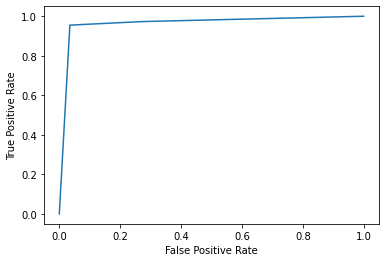

In [23]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

<AxesSubplot:>

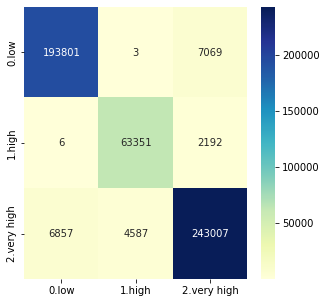

In [24]:
import seaborn as sn
df_cm = pd.DataFrame(confusion_mat, index = ["0.low","1.high","2.very high"],columns = ["0.low","1.high","2.very high"])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")